In [410]:
#import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#imoprt data
data = pd.read_csv('Churn_Modelling.csv')

#check for missing values
data.head(10)
data.info()
data.isna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [411]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [412]:
#convert categorical data
OneHotGeo = pd.get_dummies(data['Geography'])

for i in range(len(OneHotGeo.columns)):
    data.insert(i+4, list(OneHotGeo)[i], OneHotGeo.iloc[:, i])
    
OneHotGender = pd.get_dummies(data['Gender'])
for i in range(len(OneHotGender.columns)):
    data.insert(i+7, list(OneHotGender)[i], OneHotGender.iloc[:, i])

data = data.drop(['Geography', 'Gender'], axis=1)

#drop customer ID and surname
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)


In [6]:
#check head and tail
data.head()
data.tail()

,CreditScore,France,Germany,Spain,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,1,0,0,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,0,0,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,0,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,0,0,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,1,0,0,1,0,28,4,130142.79,1,1,0,38190.78,0


In [7]:
data.describe()

,CreditScore,France,Germany,Spain,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.501400,0.250900,0.247700,0.454300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.500023,0.433553,0.431698,0.497932,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,0.000000,0.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,0.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,1.000000,1.000000,1.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


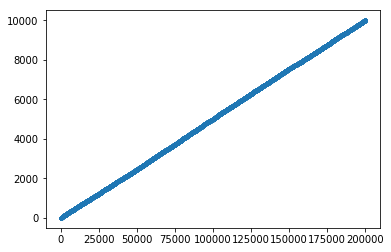

In [422]:
#ecdf
_ = plt.plot(np.sort(data.EstimatedSalary), np.arange(1, len(data.EstimatedSalary)+1), marker='.', linestyle='none')

In [49]:
#sns.pairplot(data, hue='Exited')

In [ ]:
#dist
sns.distplot(data.CreditScore)
sns.distplot(data.Age)
sns.distplot(data.Tenure)
sns.distplot(data.Balance)
sns.distplot(data.NumOfProducts)
sns.distplot(data.EstimatedSalary)

In [66]:
#correlations
corr = data.corr()

,CreditScore,France,Germany,Spain,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008928,0.005538,0.004780,0.002857,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
France,-0.008928,1.000000,-0.580359,-0.575418,-0.006772,0.006772,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955
Germany,0.005538,-0.580359,1.000000,-0.332084,0.024628,-0.024628,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488
Spain,0.004780,-0.575418,-0.332084,1.000000,-0.016889,0.016889,-0.001685,0.003868,-0.134892,0.009039,-0.013480,0.016732,-0.006482,-0.052667
Female,0.002857,-0.006772,0.024628,-0.016889,1.000000,-1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Male,-0.002857,0.006772,-0.024628,0.016889,-1.000000,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,-0.039208,0.046897,-0.001685,0.027544,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.002848,-0.000567,0.003868,-0.014733,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,-0.231329,0.401110,-0.134892,-0.012087,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.001230,-0.010419,0.009039,0.021859,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


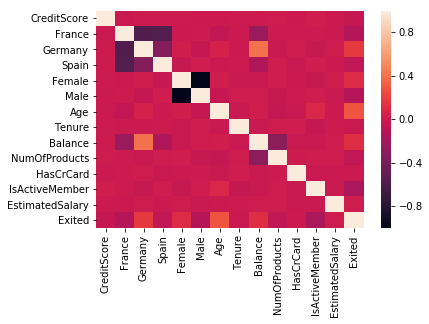

In [68]:
#correalation heatmap
sns.heatmap(corr)

0.513551621494595

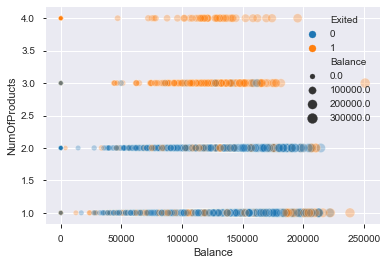

In [53]:
#balance/products and exited
#balance - number of products correlation -0.304180

#scatter plt
sns.scatterplot(x='Balance', y='NumOfProducts', hue='Exited', size='Balance', data=data, alpha=0.3)

#balance and exited
NoBalance = data.loc[data['Balance'] == 0]
NoBalance['Exited'].value_counts()
#3117, 500
HasBalance = data.loc[data['Balance'] != 0]
HasBalance['Exited'].value_counts()
#4846, 1537

NoBalance['Exited'].value_counts()[0]/NoBalance['Exited'].count()
HasBalance['Exited'].value_counts()[0]/HasBalance['Exited'].count()
##no balance has a higher rention rate(0.8617638927287807, 0.7592041359862134)

#correlations
HasBalance.corr()
#balance-exited 0.017208

#products and exited 
#customer with 3-4 products
MultiProducts = data.loc[data['NumOfProducts']>2]
#customer with 1-2 products
LessProducts = data.loc[data['NumOfProducts']<3]

#correlations
MultiProducts.corr()
#numofproducts-exited 0.192502
#balance-exited 0.345945
LessProducts.corr()
#numofproducts-exited -0.260762
#balance-exited 0.115281

MultiProducts['Exited'].value_counts()
#46, 280
LessProducts['Exited'].value_counts()
#7917, 1757

#retention rate
MultiProducts['Exited'].value_counts()[0]/MultiProducts['Exited'].count()
LessProducts['Exited'].value_counts()[0]/LessProducts['Exited'].count()
##customers who purchased 3-4 products tend to exit compared to those who purchased 1-2
##retention rates(0.1411042944785276, 0.8183791606367583)
##customers who purchased 3-4 products have balance positively related to exit decisions (0.345945)

#no balance
MultiProducts.loc[MultiProducts['Balance'] == 0]['Exited'].count()/MultiProducts['Exited'].count()
#112
#0.34355882
#8220858897
LessProducts.loc[LessProducts['Balance'] == 0]['Exited'].count()/LessProducts['Exited'].count()
#3505
#0.362311350010337
NoBalance['IsActiveMember'].value_counts()[1]/NoBalance['IsActiveMember'].count()
#1744, 1873
#0.5178324578379873
HasBalance['IsActiveMember'].value_counts()[1]/HasBalance['IsActiveMember'].count()
#3105, 3278
#0.513551621494595
##no balance does not seem to impact number of products or active status


array([ 69434.6965, 166780.4025])

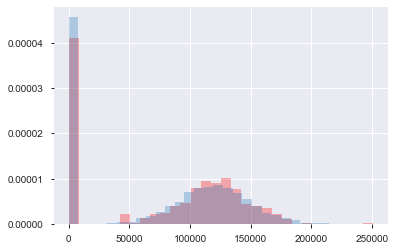

In [461]:
#products and balance
MultiBalance = MultiProducts['Balance']
LessBalance = LessProducts['Balance']
_ = plt.hist(MultiBalance, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(LessBalance, bins=30, alpha=0.3, normed=True)
MultiHasBalance = MultiProducts.loc[MultiProducts['Balance'] != 0]['Balance']
np.percentile(MultiHasBalance, [5, 95])

array([ 69413.414, 171443.558])

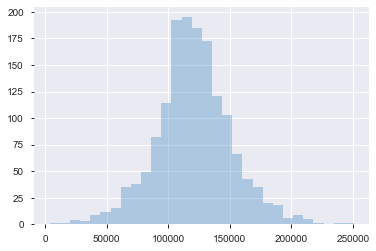

In [83]:
HasBalanceExited = HasBalance.loc[HasBalance['Exited']==1]['Balance']
#NoBalanceExited = NoBalance.loc[NoBalance['Exited']==1]['Balance']
_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3)
np.percentile(HasBalanceExited, [5, 95])
#customers with 3-4 products and has balance tend to have the same range as those exited that has balance

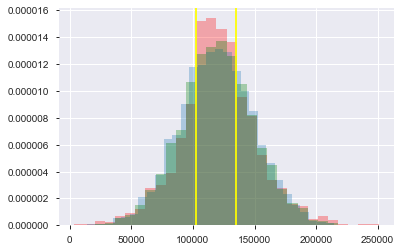

In [465]:
#customer with balance
HasBalanceExited = HasBalance.loc[HasBalance['Exited']==1]['Balance']
HasBalanceStayed = HasBalance.loc[HasBalance['Exited']==0]['Balance']
_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(HasBalanceStayed, bins=30, alpha=0.3, normed=True)
_ = plt.hist(HasBalance['Balance'], bins=30, alpha=0.3, color='green', normed=True)


#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[0], color='red')
#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[1], color='red')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[0], color='blue')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[1], color='blue')

#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[0], color='green')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[1], color='green')

_ = plt.axvline(102500, color='yellow')
_ = plt.axvline(135000, color='yellow')


In [78]:
#age/active and exited
#age - exited 0.285323

#plot
#sns.scatterplot(x='Age', y='IsActiveMember', data=data, hue='Exited', size='Balance', alpha=0.2)
#sns.distplot(IsActive.loc[IsActive['Exited'] == 1]['Age'], bins=40)
#sns.distplot(NotActive.loc[NotActive['Exited'] == 1]['Age'], bins=40)

#by active
IsActive = data.loc[data['IsActiveMember'] == 1]
NotActive = data.loc[data['IsActiveMember'] == 0]

#correlations
IsActive.corr()
#age - exited 0.173498
NotActive.corr()
#age - exited 0.466271

IsActive['Exited'].value_counts()
#4416, 735
NotActive['Exited'].value_counts()
#3547, 1302
IsActive['Exited'].count()
#5151
NotActive['Exited'].count()
#4849
##active members have higher retention rate (0.8573092603377985, 0.7314910290781604)
##51.51% of the members are active

#before 45
IsActive.loc[IsActive['Age'] <= 45]['Exited'].value_counts()
#3527, 389
NotActive.loc[NotActive['Age'] <= 45]['Exited'].value_counts()
#3282, 691

#retention rate
IsActive.loc[IsActive['Age'] <= 45]['Exited'].value_counts()[0]/IsActive.loc[IsActive['Age'] <= 45]['Exited'].count()
NotActive.loc[NotActive['Age'] <= 45]['Exited'].value_counts()[0]/NotActive.loc[NotActive['Age'] <= 45]['Exited'].count()
##before 45 active members have higher rentention rate (0.9006639427987743, 0.8263277120563806)

#after 45
IsActive.loc[IsActive['Age'] > 45]['Exited'].value_counts()
#889, 346
NotActive.loc[NotActive['Age'] > 45]['Exited'].value_counts()
#265, 611

#retention rate
IsActive.loc[IsActive['Age'] > 45]['Exited'].value_counts()[0]/IsActive.loc[IsActive['Age'] > 45]['Exited'].count()
NotActive.loc[NotActive['Age'] > 45]['Exited'].value_counts()[0]/NotActive.loc[NotActive['Age'] > 45]['Exited'].count()
##after 45 not active members have very low retention rate (0.719838056680162, 0.3025114155251142)


0.3025114155251142

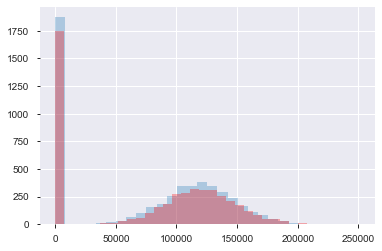

In [460]:
#active status and balance
ActiveBalance = IsActive['Balance']
NoActiveBalance = NotActive['Balance']
_ = plt.hist(ActiveBalance, bins=30, alpha=0.3)
_ = plt.hist(NoActiveBalance, bins=30, alpha=0.3, color='red')


1    0.694792
0    0.305208
Name: HasCrCard, dtype: float64

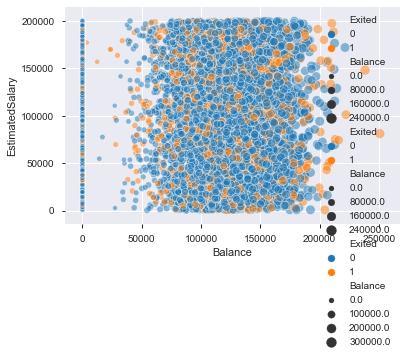

In [56]:
#country and balance/products/credit card
#fr, gr, sp - balance correalations -0.231329, 0.401110, -0.134892

#by country
France = data.loc[data['France'] == 1]
Germany = data.loc[data['Germany'] == 1]
Spain = data.loc[data['Spain'] == 1]

#scatter plots
sns.scatterplot(x='Balance', y='EstimatedSalary', data=France, size='Balance', hue='Exited', alpha=0.5)
sns.scatterplot(x='Balance', y='EstimatedSalary', data=Germany, size='Balance', hue='Exited',alpha=0.5)
sns.scatterplot(x='Balance', y='EstimatedSalary', data=Spain, size='Balance', hue='Exited', alpha=0.5)

#for each country:
#retention rate
France['Exited'].value_counts()
#4204, 810
Germany['Exited'].value_counts()
#1695, 814
Spain['Exited'].value_counts()
#2064, 413

#retention rate
France['Exited'].value_counts()[0]/France['Exited'].count()
Germany['Exited'].value_counts()[0]/Germany['Exited'].count()
Spain['Exited'].value_counts()[0]/Spain['Exited'].count()
##Germany has a lower retention rate(0.8384523334662943, 0.6755679553607015, 0.8332660476382721)
##salary structures are similiar and don't seem to affect balance

#no balance
FRNoBalance = France.loc[data['Balance'] == 0]
GRNoBalance = Germany.loc[data['Balance'] == 0]
SPNoBalance = Spain.loc[data['Balance'] == 0]

#no balance rate
FRNoBalance.France.count()/France.France.count()
#2418/5014
GRNoBalance.Germany.count()/Germany.Germany.count()
#0/2509
SPNoBalance.Spain.count()/Spain.Spain.count()
#1199/2477
##Germany has extremely low no balance rate(0.48224970083765456, 0.0, 0.4840532902704885)

#balance median
France['Balance'].median()
#62153.5
Germany['Balance'].median()
#119703.1
Spain['Balance'].median()
#61710.44
##Germany tends to have more balance

#products
France['NumOfProducts'].value_counts()
#(2514, 2367, 104, 29)/5014
France['NumOfProducts'].value_counts()/France['NumOfProducts'].count()
#(0.501396090945353, 0.47207818109293975, 0.020741922616673316, 0.0057838053450339055)
Germany['NumOfProducts'].value_counts()
#(1349, 1040, 96, 24)/2509
Germany['NumOfProducts'].value_counts()/Germany['NumOfProducts'].count()
#(0.5376644081307294, 0.41450777202072536, 0.038262255878836186, 0.009565563969709047)
Spain['NumOfProducts'].value_counts()
#(1221, 1183, 66, 7)/2477
Spain['NumOfProducts'].value_counts()/Spain['NumOfProducts'].count()
#(0.4929350020185709, 0.4775938635446104, 0.026645135244247074, 0.002825999192571659)
##similiar product purchasing structures

#credit card
France['HasCrCard'].value_counts()
#(1471, 3543)/5014
France['HasCrCard'].value_counts()/France['HasCrCard'].count()
#(0.29337854008775427, 0.7066214599122457)
Germany['HasCrCard'].value_counts()
#(718, 1791)/2509
Germany['HasCrCard'].value_counts()/Germany['HasCrCard'].count()
#(0.28616978876046234, 0.7138302112395377)
Spain['HasCrCard'].value_counts()
#(756, 1721)/2477
Spain['HasCrCard'].value_counts()/Spain['HasCrCard'].count()
#(0.3052079127977392, 0.6947920872022608)
##similiar credit card holding rates

0.6078066914498141

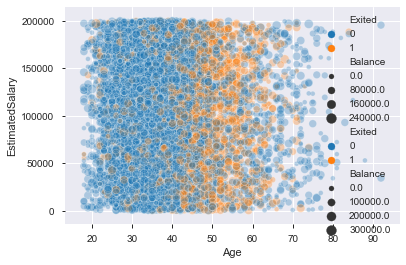

In [114]:
#gender
#female, male - exited correaltion 0.106512, -0.106512

#by gender
Female = data.loc[data['Female'] == 1]
Male = data.loc[data['Male'] == 1]

#plots
sns.scatterplot(x='Age', y='EstimatedSalary', data=Female, hue='Exited', size='Balance', alpha=0.3)
sns.scatterplot(x='Age', y='EstimatedSalary', data=Male, hue='Exited', size='Balance', alpha=0.3)

#retention rate
Female['Exited'].value_counts()
#3404, 1139
Male['Exited'].value_counts()
#4559, 898

Female['Exited'].value_counts()[0]/Female['Exited'].count()
Male['Exited'].value_counts()[0]/Male['Exited'].count()
##Male has higher retention rate (0.7492846136913933, 0.8354407183434122)

#age > 45 group
Female.loc[Female['Age'] > 45]['Age'].count()/Female['Age'].count()
#0.22782302443319394
Male.loc[Male['Age'] > 45]['Age'].count()/Male['Age'].count()
#0.19717793659519883
Male.loc[Male['Age'] > 45]['IsActiveMember'].value_counts()[1]/Male.loc[Male['Age'] > 45]['IsActiveMember'].count()
#0.6143122676579925
Female.loc[Female['Age'] > 45]['IsActiveMember'].value_counts()[1]/Female.loc[Female['Age'] > 45]['IsActiveMember'].count()
#0.5545893719806764
##Female has larger age > 45 portion and lower active rate for age > 45

#retention rate
Female.loc[Female['Age'] > 45]['Exited'].value_counts()
#500, 535
Male.loc[Male['Age'] > 45]['Exited'].value_counts()
#654, 422

Female.loc[Female['Age'] > 45]['Exited'].value_counts()[0]/Female.loc[Female['Age'] > 45]['Exited'].count()
Male.loc[Male['Age'] > 45]['Exited'].value_counts()[0]/Male.loc[Male['Age'] > 45]['Exited'].count()
##for age > 45, female has lower retention rate (0.4830917874396135, 0.6078066914498141)



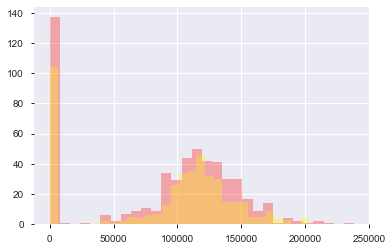

In [459]:
#age > 45 balance
Female45PlusBlance = Female.loc[Female['Age'] > 45]['Balance']
Male45PlusBlance = Male.loc[Male['Age'] > 45]['Balance']
#_ = plt.hist(Female45PlusBlance, bins=30, alpha=0.3, color='green')
#_ = plt.hist(Male45PlusBlance, bins=30, alpha=0.3, color='blue')
#female>45 has more around 900000-150000 balance

Female45PlusExitedBlance = Female.loc[Female['Age'] > 45].loc[Female['Exited']==1]['Balance']
Male45PlusExitedBlance = Male.loc[Male['Age'] > 45].loc[Male['Exited']==1]['Balance']
_ = plt.hist(Female45PlusExitedBlance, bins=30, alpha=0.3, color='red')
_ = plt.hist(Male45PlusExitedBlance, bins=30, alpha=0.3, color='yellow')

#exited females age >45 tend to have more balance than exited males age>45

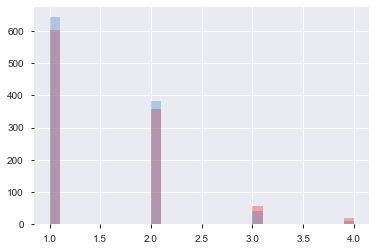

In [73]:
#age>45 products
Female45PlusProducts = Female.loc[Female['Age'] > 45]['NumOfProducts']
Male45PlusProducts = Male.loc[Male['Age'] > 45]['NumOfProducts']

_ = plt.hist(Female45PlusProducts, bins=30, alpha=0.3, color='red')
_ = plt.hist(Male45PlusProducts, bins=30, alpha=0.3)
#female age >45 slightly tend to buy more products

In [ ]:
#tenure groups
LongTerm =data.loc[data['Tenure'] > 7]
MidTerm = data.loc[data['Tenure'] > 3][data['Tenure'] <= 7]
ShortTerm = data.loc[data['Tenure'] <= 3]

LongTerm['Exited'].value_counts()[0]/LongTerm['Exited'].count()
MidTerm['Exited'].value_counts()/MidTerm['Exited'].count()
ShortTerm['Exited'].value_counts()/ShortTerm['Exited'].count()
##similiar rentention rate for different tenure groups(0.7955182072829131, 0.8035535535535535, 0.7885877318116976)


In [ ]:
#credit score/credit card/salary
#plots
sns.scatterplot(x='Balance', y='HasCrCard', hue='Exited', size='CreditScore', data=data, alpha=0.3)
sns.scatterplot(x='CreditScore', y='Balance', hue='HasCrCard', size='NumOfProducts', data=data, alpha=0.3)
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited', size='CreditScore', data=data, alpha=0.3)
##no significant trend

In [89]:
#report
import pandas_profiling
pandas_profiling.ProfileReport(data)

In [ ]:
#######

In [90]:
#Statistical Data Analysis

#questions:
#customers that have balance between a certain range tend to exit?
#no balance's effect/cause?
#not active & age>45, germany, products 3-4 tend to exit because of balance?

#variables:
#balance; exited; age, gender, active, geo

#significant diff in subgroups
#age>45 inactive female; germany; 3-4 products; 

#strong corr:
#

#tests:
#bs pairs
#bs pairs
#perm pairs

In [17]:
import scipy.stats as stats
import pymc3 as pm

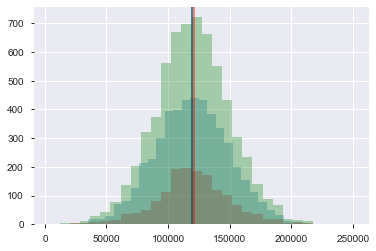

In [445]:
#customer with balance
HasBalanceExited = HasBalance.loc[HasBalance['Exited']==1]['Balance']
HasBalanceStayed = HasBalance.loc[HasBalance['Exited']==0]['Balance']
_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalanceStayed, bins=30, alpha=0.3)
_ = plt.hist(HasBalance['Balance'], bins=30, alpha=0.3, color='green')

#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[0], color='red')
#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[1], color='red')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[0], color='blue')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[1], color='blue')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[0], color='green')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[1], color='green')

_ = plt.axvline(np.mean(HasBalanceExited), color='red', alpha=0.5)
_ = plt.axvline(np.mean(HasBalanceStayed), color='blue', alpha=0.5)
_ = plt.axvline(np.mean(HasBalance['Balance']), color='green', alpha=0.5)

#non zero balance, stayed customers' non zero balance and exited customers' non zero balance seem to have similiar distributions

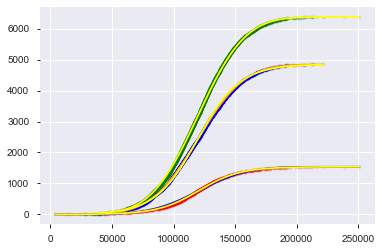

In [214]:
#ecdf
_ = plt.plot(np.sort(HasBalanceExited), np.arange(1, len(HasBalanceExited)+1), color='red', marker='.', linestyle='none', alpha=0.1)
_ = plt.plot(np.sort(HasBalanceStayed), np.arange(1, len(HasBalanceStayed)+1), color='blue', marker='.', linestyle='none', alpha=0.1)
_ = plt.plot(np.sort(HasBalance['Balance']), np.arange(1, len(HasBalance['Balance'])+1), color='green', marker='.', linestyle='none', alpha=0.1)

#theoretical cdf
HasBalanceNormLc, HasBalanceNormSc = stats.norm.fit(HasBalance['Balance'])
HasBalanceStayedNormLc, HasBalanceStayedNormSc = stats.norm.fit(HasBalanceStayed)
HasBalanceStayedLogLc, HasBalanceStayedLogSc = stats.logistic.fit(HasBalanceStayed)
HasBalanceExitedNormLc, HasBalanceExitedNormSc = stats.norm.fit(HasBalanceExited)
HasBalanceExitedTDf, HasBalanceExitedTLc, HasBalanceExitedTSc = stats.t.fit(HasBalanceExited)
HasBalanceExitedLogLc, HasBalanceExitedLogSc = stats.logistic.fit(HasBalanceExited)

_ = plt.plot(np.sort(HasBalance['Balance']), stats.norm.cdf(np.sort(HasBalance['Balance']), HasBalanceNormLc, HasBalanceNormSc)*(len(HasBalance['Balance'])+1), color='yellow')
_ = plt.plot(np.sort(HasBalanceStayed), stats.norm.cdf(np.sort(HasBalanceStayed), HasBalanceStayedNormLc, HasBalanceStayedNormSc)*(len(HasBalanceStayed)+1), color='orange')
_ = plt.plot(np.sort(HasBalanceStayed), stats.logistic.cdf(np.sort(HasBalanceStayed), HasBalanceStayedLogLc, HasBalanceStayedLogSc)*(len(HasBalanceStayed)+1), color='yellow')
_ = plt.plot(np.sort(HasBalanceExited), stats.norm.cdf(np.sort(HasBalanceExited), HasBalanceExitedNormLc, HasBalanceExitedNormSc)*(len(HasBalanceExited)+1), color='orange')
_ = plt.plot(np.sort(HasBalanceExited), stats.t.cdf(np.sort(HasBalanceExited), HasBalanceExitedTDf, HasBalanceExitedTLc, HasBalanceExitedTSc)*(len(HasBalanceExited)+1), color='blue')
_ = plt.plot(np.sort(HasBalanceExited), stats.logistic.cdf(np.sort(HasBalanceExited), HasBalanceExitedLogLc, HasBalanceExitedLogSc)*(len(HasBalanceExited)+1), color='yellow')

#HasBalance and HasBalanceStayed are normal dist, HasBalanceExited is logistic dist
#ecdfs overlay well with thereoretical cdfs

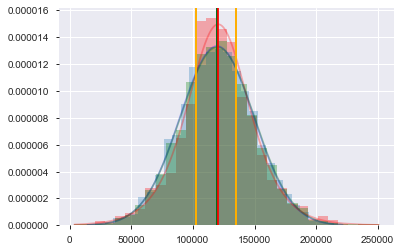

In [291]:
_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(HasBalanceStayed, bins=30, alpha=0.3, normed=True)
_ = plt.hist(HasBalance['Balance'], bins=30, alpha=0.3, color='green', normed=True)

#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[0], color='red')
#_ = plt.axvline(np.percentile(HasBalanceExited, [5, 95])[1], color='red')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[0], color='blue')
#_ = plt.axvline(np.percentile(HasBalanceStayed, [5, 95])[1], color='blue')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[0], color='green')
#_ = plt.axvline(np.percentile(HasBalance['Balance'], [5, 95])[1], color='green')

#_ = plt.axvline(np.mean(HasBalanceExited), color='red', alpha=0.5)
#_ = plt.axvline(np.mean(HasBalanceStayed), color='blue', alpha=0.5)
#_ = plt.axvline(np.mean(HasBalance['Balance']), color='green', alpha=0.5)

_ = plt.plot(np.sort(HasBalanceStayed), stats.norm.pdf(np.sort(HasBalanceStayed), HasBalanceStayedNormLc, HasBalanceStayedNormSc), color='blue', alpha=0.3)
_ = plt.plot(np.sort(HasBalanceExited), stats.logistic.pdf(np.sort(HasBalanceExited), HasBalanceExitedLogLc, HasBalanceExitedLogSc), color='red', alpha=0.3)
_ = plt.plot(np.sort(HasBalance['Balance']), stats.norm.pdf(np.sort(HasBalance['Balance']), HasBalanceNormLc, HasBalanceNormSc), color='green', alpha=0.3)

_ = plt.axvline(HasBalanceStayedNormLc, color='blue')
_ = plt.axvline(HasBalanceNormLc, color='green')
_ = plt.axvline(HasBalanceExitedLogLc, color='red')

_ = plt.axvline(102500, color='yellow')
_ = plt.axvline(135000, color='yellow')

_ = plt.axvline(stats.logistic.ppf(0.25, HasBalanceExitedLogLc, HasBalanceExitedLogSc), color='orange')
_ = plt.axvline(stats.logistic.ppf(0.70, HasBalanceExitedLogLc, HasBalanceExitedLogSc), color='orange')



#customers with balance between 102500 - 135000 /[25, 70] tend to leave more
#pdfs overlay well

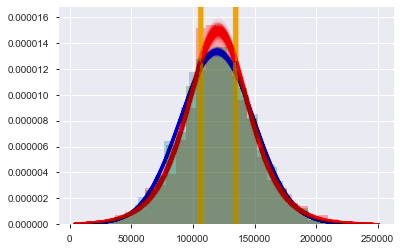

In [380]:
#ci for distribution parameters

_ = plt.hist(HasBalanceExited, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(HasBalanceStayed, bins=30, alpha=0.3, normed=True)
_ = plt.hist(HasBalance['Balance'], bins=30, alpha=0.3, color='green', normed=True)

_ = plt.plot(np.sort(HasBalanceStayed), stats.norm.pdf(np.sort(HasBalanceStayed), HasBalanceStayedNormLc, HasBalanceStayedNormSc), color='blue', alpha=0.3)
_ = plt.plot(np.sort(HasBalanceExited), stats.logistic.pdf(np.sort(HasBalanceExited), HasBalanceExitedLogLc, HasBalanceExitedLogSc), color='red', alpha=0.3)
_ = plt.plot(np.sort(HasBalance['Balance']), stats.norm.pdf(np.sort(HasBalance['Balance']), HasBalanceNormLc, HasBalanceNormSc), color='green', alpha=0.3)

n = 1000

for i in range(n):
    HasBalanceStayedBS = np.random.choice(HasBalanceStayed, len(HasBalanceStayed))
    HasBalanceStayedBSLc, HasBalanceStayedBSSc = stats.norm.fit(HasBalanceStayedBS)
    _ = plt.plot(np.sort(HasBalanceStayedBS), stats.norm.pdf(np.sort(HasBalanceStayedBS), HasBalanceStayedBSLc, HasBalanceStayedBSSc), color='blue', alpha=0.01)

for i in range(n):
    HasBalanceExitedBS = np.random.choice(HasBalanceExited, len(HasBalanceExited))
    HasBalanceExitedBSLc, HasBalanceExitedBSSc = stats.logistic.fit(HasBalanceExitedBS)
    _ = plt.plot(np.sort(HasBalanceExitedBS), stats.logistic.pdf(np.sort(HasBalanceExitedBS), HasBalanceExitedBSLc, HasBalanceExitedBSSc), color='red', alpha=0.01)
    _ = plt.axvline(stats.logistic.ppf(0.30, HasBalanceExitedBSLc, HasBalanceExitedBSSc), color='orange', alpha=0.01)
    _ = plt.axvline(stats.logistic.ppf(0.70, HasBalanceExitedBSLc, HasBalanceExitedBSSc), color='orange', alpha=0.01)
    
#from simulation can tell [30, 70] tend to leave more

In [446]:
#95% confidence intervels
#define bootstrap function

def bs_rep(data, func, size):
    rep = np.empty(size)
    for i in range(size):
        bs = np.random.choice(data, len(data))
        rep[i] = func(bs)
    return rep

n = 10000
HasBalanceExitedMeanCI = np.percentile(bs_rep(HasBalanceExited, np.mean, n), [2.5, 97.5])
HasBalanceExitedStdCI = np.percentile(bs_rep(HasBalanceExited, np.std, n), [2.5, 97.5])
HasBalanceStayedMeanCI = np.percentile(bs_rep(HasBalanceStayed, np.mean, n), [2.5, 97.5])
HasBalanceStayedStdCI = np.percentile(bs_rep(HasBalanceStayed, np.std, n), [2.5, 97.5])
HasBalanceExitedMeanCI, HasBalanceExitedStdCI, HasBalanceStayedMeanCI, HasBalanceStayedStdCI
#(array([119204.61233393, 122283.12203969]),
#array([29248.69979372, 31874.10350709]),
#array([118684.88234797, 120385.14285602]),
#array([29364.8433063 , 30524.31485055]))

(array([119204.61233393, 122283.12203969]),
 array([29248.69979372, 31874.10350709]),
 array([118684.88234797, 120385.14285602]),
 array([29364.8433063 , 30524.31485055]))

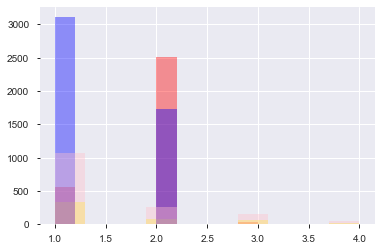

In [328]:
#no balance's effect on products 
#balance-exited hist
NoBalanceStayedProducts = NoBalance.loc[NoBalance['Exited']==0]['NumOfProducts']
NoBalanceExitedProducts = NoBalance.loc[NoBalance['Exited']==1]['NumOfProducts']
HasBalanceExitedProducts = HasBalance.loc[HasBalance['Exited']==1]['NumOfProducts']
HasBalanceStayedProducts = HasBalance.loc[HasBalance['Exited']==0]['NumOfProducts']
_ = plt.hist(NoBalanceStayedProducts, alpha=0.4, color='red')
_ = plt.hist(NoBalanceExitedProducts, alpha=0.4, color='yellow')
_ = plt.hist(HasBalanceStayedProducts, alpha=0.4, color='blue')
_ = plt.hist(HasBalanceExitedProducts, alpha=0.4, color='pink')
#stayed customers tend to buy only 1-2 products(no balance stayed tend to buy 2)
#other than no balance stayed customers, most customers tend to buy less products

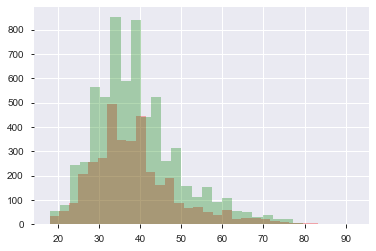

In [125]:
#no balance
NoBalance = data.loc[data['Balance'] == 0]
HasBalance = data.loc[data['Balance'] != 0]
_ = plt.hist(NoBalance['Age'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['Age'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['CreditScore'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['CreditScore'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['NumOfProducts'], alpha=0.3, color='red')
_ = plt.hist(HasBalance['NumOfProducts'], alpha=0.3, color='green')
#no balance customers tend to buy 2 products

_ = plt.hist(NoBalance['Tenure'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['Tenure'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['EstimatedSalary'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['EstimatedSalary'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['HasCrCard'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['HasCrCard'], bins=30, alpha=0.3, color='green')

_ = plt.hist(NoBalance['IsActiveMember'], bins=30, alpha=0.3, color='red')
_ = plt.hist(HasBalance['IsActiveMember'], bins=30, alpha=0.3, color='green')

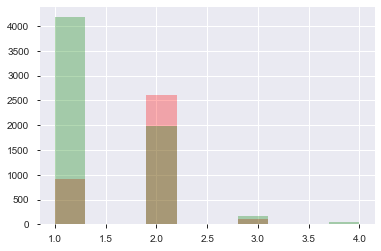

In [462]:
_ = plt.hist(NoBalance['NumOfProducts'], alpha=0.3, color='red')
_ = plt.hist(HasBalance['NumOfProducts'], alpha=0.3, color='green')
#no balance customers tend to buy 2 products

In [ ]:
##not active & age>45, germany, products 3-4 tend to exit?

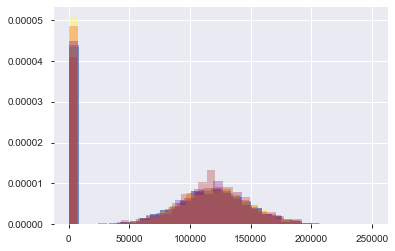

In [353]:
#not active tend to have more 0 balance
ActiveBalance = IsActive['Balance']
NoActiveBalance = NotActive['Balance']
Active45Less = IsActive.loc[IsActive['Age']<=45]['Balance']
NActive45Less = NotActive.loc[NotActive['Age']<=45]['Balance']
Active45Plus = IsActive.loc[IsActive['Age']>45]['Balance']
NActive45Plus = NotActive.loc[NotActive['Age']>45]['Balance']

_ = plt.hist(ActiveBalance, bins=30, alpha=0.3, color='green', normed=True)
_ = plt.hist(NoActiveBalance, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(Active45Less, bins=30, alpha=0.3, color='blue', normed=True)
_ = plt.hist(NActive45Less, bins=30, alpha=0.3, color='yellow', normed=True)
_ = plt.hist(Active45Plus, bins=30, alpha=0.3, color='purple', normed=True)
_ = plt.hist(NActive45Plus, bins=30, alpha=0.3, color='brown', normed=True)

#NActive45Plus compared to other not active groups has less 0 more balance within the range
#active groups show similar dist
#active, not active have similar dist but no acitve has more 0 balance
#NActive45Less has more 0 balance

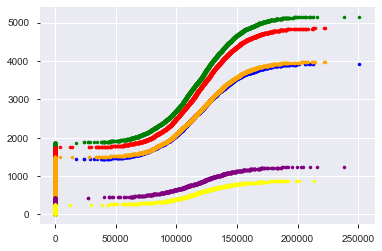

In [374]:
#ecdf
_ = plt.plot(np.sort(ActiveBalance), np.arange(1, len(ActiveBalance)+1), color='green', marker='.', linestyle='none')
_ = plt.plot(np.sort(NoActiveBalance), np.arange(1, len(NoActiveBalance)+1), color='red', marker='.', linestyle='none')
_ = plt.plot(np.sort(Active45Less), np.arange(1, len(Active45Less)+1), color='blue', marker='.', linestyle='none')
_ = plt.plot(np.sort(NActive45Less), np.arange(1, len(NActive45Less)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(Active45Plus), np.arange(1, len(Active45Plus)+1), color='purple', marker='.', linestyle='none')
_ = plt.plot(np.sort(NActive45Plus), np.arange(1, len(NActive45Plus)+1), color='yellow', marker='.', linestyle='none')
#age45
#active seems to only affect 0 balnce 

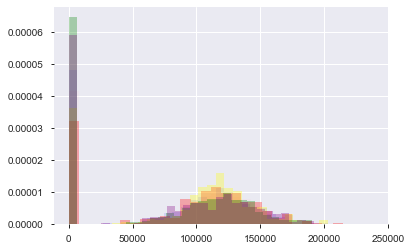

In [354]:
#group/control group balance hist, perm pairs, p value

#not active female >45
#age > 45 balance
Female45PlusBalance = Female.loc[Female['Age'] > 45]['Balance']
Male45PlusBalance = Male.loc[Male['Age'] > 45]['Balance']
Female45PlusExitedBalance = Female.loc[Female['Age'] > 45].loc[Female['Exited']==1]['Balance']
Male45PlusExitedBalance = Male.loc[Male['Age'] > 45].loc[Male['Exited']==1]['Balance']
Female45PlusStayedBalance = Female.loc[Female['Age'] > 45].loc[Female['Exited']==0]['Balance']
Male45PlusStayedBalance = Male.loc[Male['Age'] > 45].loc[Male['Exited']==0]['Balance']

_ = plt.hist(Female45PlusBalance, bins=30, alpha=0.1, color='pink', normed=True)
_ = plt.hist(Male45PlusBalance, bins=30, alpha=0.1, color='blue', normed=True)
_ = plt.hist(Female45PlusExitedBalance, bins=30, alpha=0.3, color='red', normed=True)
_ = plt.hist(Male45PlusExitedBalance, bins=30, alpha=0.3, color='yellow', normed=True)
_ = plt.hist(Female45PlusStayedBalance, bins=30, alpha=0.3, color='green', normed=True)
_ = plt.hist(Male45PlusStayedBalance, bins=30, alpha=0.3, color='purple', normed=True)


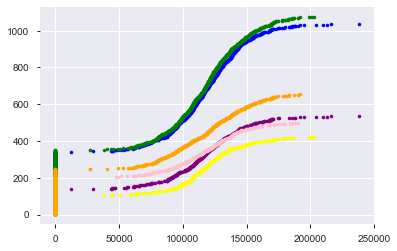

In [375]:
#ecdf
_ = plt.plot(np.sort(Female45PlusBalance), np.arange(1, len(Female45PlusBlance)+1), color='blue', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusBalance), np.arange(1, len(Male45PlusBlance)+1), color='green', marker='.', linestyle='none')
_ = plt.plot(np.sort(Female45PlusExitedBalance), np.arange(1, len(Female45PlusExitedBlance)+1), color='purple', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusExitedBalance), np.arange(1, len(Male45PlusExitedBlance)+1), color='yellow', marker='.', linestyle='none')
_ = plt.plot(np.sort(Female45PlusStayedBalance), np.arange(1, len(Female45PlusStayedBlance)+1), color='pink', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusStayedBalance), np.arange(1, len(Male45PlusStayedBlance)+1), color='orange', marker='.', linestyle='none')
#age, exited 
#exited seems to affect dist, gender seems to affect 0 balance

In [393]:
#bs function
def bs_rep(data, func, size):
    rep = np.empty(size)
    for i in range(size):
        bs = np.random.choice(data, len(data))
        rep[i] = func(bs)
    return rep

#pm function
def pm_rep(data1, data2, func, size):
    reps = np.empty(size)
    for i in range(size):
        data = np.concatenate((data1, data2))
        pmdata = np.random.permutation(data)
        pmdata1 = pmdata[:len(data1)]
        pmdata2 = pmdata[len(data1):]
        reps[i] = func(pmdata1) - func(pmdata2)
        _ = plt.plot(np.sort(pmdata1), np.arange(1, len(pmdata1)+1), alpha=0.01, color='blue', marker='.', linestyle='none')
        _ = plt.plot(np.sort(pmdata2), np.arange(1, len(pmdata2)+1), alpha=0.01, color='orange', marker='.', linestyle='none')
    return reps


0.0008

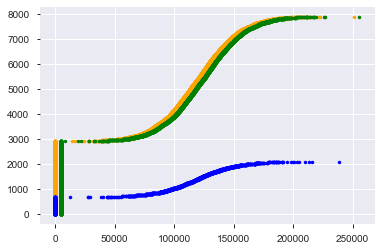

In [426]:
##hypothesis: age 45 before and after have different balance mean
#test: bs; test statistic: diff of mean
#H0: same mean; HA: diff mean

#group age<=45 and age>45
Age45Less = data.loc[data['Age']<=45]['Balance']
Age45Plus = data.loc[data['Age']>45]['Balance']

_ = plt.plot(np.sort(Age45Less), np.arange(1, len(Age45Less)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(Age45Plus), np.arange(1, len(Age45Plus)+1), color='blue', marker='.', linestyle='none')


#empirical diff of mean
Ep45Diff = np.mean(Age45Plus) - np.mean(Age45Less)

#shifted 
UniMean = np.mean(Age45Plus + Age45Less)
Age45LessShifted = Age45Less - np.mean(Age45Less) + np.mean(Age45Plus)
_ = plt.plot(np.sort(Age45LessShifted), np.arange(1, len(Age45LessShifted)+1), color='green', marker='.', linestyle='none')


#bs
np.random.seed(42)
n = 10000
Bs45Diff = bs_rep(Age45Plus, np.mean, n) - bs_rep(Age45LessShifted, np.mean, n)


#p
p = np.sum(Bs45Diff >= Ep45Diff)/n
p
#0.0008
#not likely to have same mean

0.001

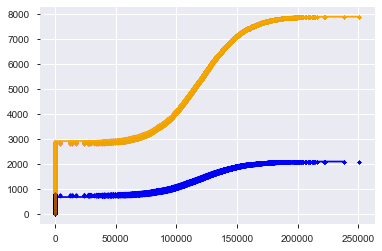

In [448]:

##hypothesis: age 45 before and after no 0 balance have different balance dist and mean
#test: pm; test statistic: diff mean
#H0: same dist; HA: diff dist

#Age45LessNZ = data.loc[data['Age']<=45].loc[data['Balance'] != 0]['Balance']
#Age45PlusNZ = data.loc[data['Age']>45].loc[data['Balance'] != 0]['Balance']
_ = plt.plot(np.sort(Age45Less), np.arange(1, len(Age45Less)+1), color='orange')
_ = plt.plot(np.sort(Age45Plus), np.arange(1, len(Age45Plus)+1), color='blue')

n = 1000
np.random.seed(42)
Ep45Diff = np.mean(Age45Plus) - np.mean(Age45Less)
Pm45Diff = pm_rep(Age45Plus, Age45Less, np.mean, n)
p = np.sum(Pm45Diff >= Ep45Diff)/n
p
#p value 0.001 not likely have same means 
#two parts from same distribution 
    

0.3859

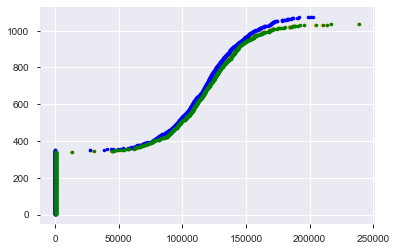

In [430]:
#hypothesis: female&male 45 same means
#bs
#groups 
Female45PlusBalance = Female.loc[Female['Age'] > 45]['Balance']
Male45PlusBalance = Male.loc[Male['Age'] > 45]['Balance']
_ = plt.plot(np.sort(Female45PlusBalance), np.arange(1, len(Female45PlusBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusBalance), np.arange(1, len(Male45PlusBalance)+1), color='blue', marker='.', linestyle='none')

#empirical
EpFMDiff = np.mean(Male45PlusBalance) - np.mean(Female45PlusBalance)

#shifted
Female45PlusShifted = Female45PlusBalance - np.mean(Female45PlusBalance) + np.mean(Male45PlusBalance)
_ = plt.plot(np.sort(Female45PlusShifted), np.arange(1, len(Female45PlusShifted)+1), color='green', marker='.', linestyle='none')

#bs
np.random.seed(42)
n = 10000
BsFMDiff = bs_rep(Male45PlusBalance, np.mean, n) - bs_rep(Female45PlusShifted, np.mean, n)
p = np.sum(BsFMDiff >= EpFMDiff)/n
p
#0.3859 female&male 45 might have same means


0.397

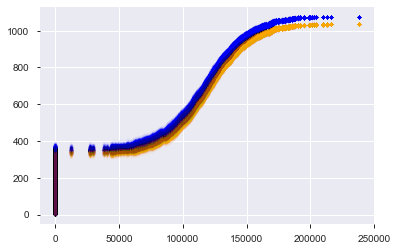

In [396]:
#hypothesis: female&male 45 same dists and means
#groups
Female45PlusBalance = Female.loc[Female['Age'] > 45]['Balance']
Male45PlusBalance = Male.loc[Male['Age'] > 45]['Balance']
_ = plt.plot(np.sort(Female45PlusBalance), np.arange(1, len(Female45PlusBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(Male45PlusBalance), np.arange(1, len(Male45PlusBalance)+1), color='blue', marker='.', linestyle='none')

#pm
n = 1000
np.random.seed(42)
EpFMDiff = np.mean(Male45PlusBalance) - np.mean(Female45PlusBalance)
PmFMDiff = pm_rep(Male45PlusBalance, Female45PlusBalance, np.mean, n)
p = np.sum(PmFMDiff >= EpFMDiff)/n
p
#0.397


#age>45 female and male likely to have same dist and might same means

0.0199

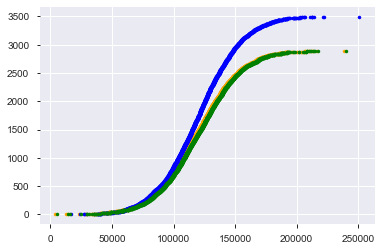

In [435]:
#hyphothesis: female&male non 0 balance have same mean and dist
#groups
FemaleBalanceNZ = Female.loc[Female['Balance'] != 0]['Balance']
MaleBalanceNZ = Male.loc[Male['Balance'] != 0]['Balance']

_ = plt.plot(np.sort(FemaleBalanceNZ), np.arange(1, len(FemaleBalanceNZ)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(MaleBalanceNZ), np.arange(1, len(MaleBalanceNZ)+1), color='blue', marker='.', linestyle='none')

#shifted
FemaleBalanceNZShifted = FemaleBalanceNZ - np.mean(FemaleBalanceNZ) + np.mean(MaleBalanceNZ)
_ = plt.plot(np.sort(FemaleBalanceNZShifted), np.arange(1, len(FemaleBalanceNZShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
EpFMNZDiff = np.mean(MaleBalanceNZ) - np.mean(FemaleBalanceNZ)
BsFMNZDiff = bs_rep(MaleBalanceNZ, np.mean, n) - bs_rep(FemaleBalanceNZShifted, np.mean, n)
p = np.sum(BsFMNZDiff >= EpFMNZDiff)/n
p
#0.0199 not enough to reject null




0.021

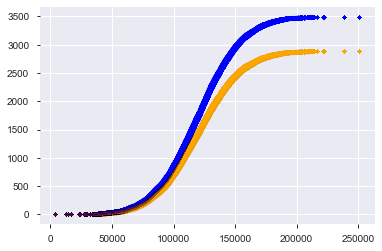

In [436]:
#hyphothesis: female&male non 0 balance have same mean and dist
#groups
FemaleBalanceNZ = Female.loc[Female['Balance'] != 0]['Balance']
MaleBalanceNZ = Male.loc[Male['Balance'] != 0]['Balance']

_ = plt.plot(np.sort(FemaleBalanceNZ), np.arange(1, len(FemaleBalanceNZ)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(MaleBalanceNZ), np.arange(1, len(MaleBalanceNZ)+1), color='blue', marker='.', linestyle='none')

#pm
n = 1000
np.random.seed(42)
EpFMNZDiff = np.mean(MaleBalanceNZ) - np.mean(FemaleBalanceNZ)
PmFMNZDiff = pm_rep(MaleBalanceNZ, FemaleBalanceNZ, np.mean, n)
p = np.sum(PmFMNZDiff >= EpFMNZDiff)/n
p
#0.021 can have same mean, likly same dist

0.115

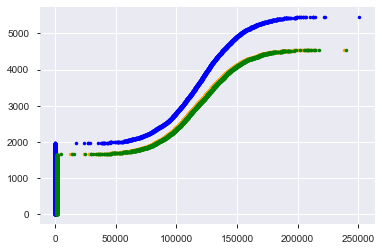

In [449]:
#hyphothesis: female&male balance have same mean and dist
#groups
FemaleBalance = Female['Balance']
MaleBalance = Male['Balance']

_ = plt.plot(np.sort(FemaleBalance), np.arange(1, len(FemaleBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(MaleBalance), np.arange(1, len(MaleBalance)+1), color='blue', marker='.', linestyle='none')

#shifted
FemaleBalanceShifted = FemaleBalance - np.mean(FemaleBalance) + np.mean(MaleBalance)
_ = plt.plot(np.sort(FemaleBalanceShifted), np.arange(1, len(FemaleBalanceShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
EpFMDiff = np.mean(MaleBalance) - np.mean(FemaleBalance)
BsFMDiff = bs_rep(MaleBalance, np.mean, n) - bs_rep(FemaleBalanceShifted, np.mean, n)
p = np.sum(BsFMDiff >= EpFMDiff)/n
p
#0.115


0.118

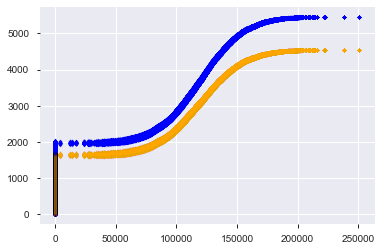

In [450]:
#hyphothesis: female&male balance have same mean and dist
#groups
FemaleBalance = Female['Balance']
MaleBalance = Male['Balance']

_ = plt.plot(np.sort(FemaleBalance), np.arange(1, len(FemaleBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(MaleBalance), np.arange(1, len(MaleBalance)+1), color='blue', marker='.', linestyle='none')

#pm
n = 1000
np.random.seed(42)
EpFMDiff = np.mean(MaleBalance) - np.mean(FemaleBalance)
PmFMDiff = pm_rep(MaleBalance, FemaleBalance, np.mean, n)
p = np.sum(PmFMDiff >= EpFMDiff)/n
p
#0.118

0.837

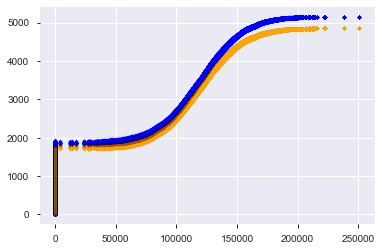

In [397]:
#hypothesis: active&not same dist
#groups
IsActiveBalance = data.loc[data['IsActiveMember'] == 1]['Balance']
NotActiveBalance = data.loc[data['IsActiveMember'] == 0]['Balance']
_ = plt.plot(np.sort(NotActiveBalance), np.arange(1, len(NotActiveBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(IsActiveBalance), np.arange(1, len(IsActiveBalance)+1), color='blue', marker='.', linestyle='none')

#pm
n = 1000
np.random.seed(42)
EpActDiff = np.mean(IsActiveBalance) - np.mean(NotActiveBalance)
PmActDiff = pm_rep(IsActiveBalance, NotActiveBalance, np.mean, n)
p = np.sum(PmActDiff >= EpActDiff)/n
p

#0.837 active and non active likely to have same dist and mean

0.845

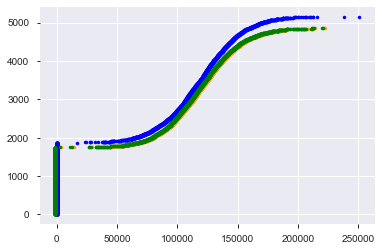

In [425]:
#hypothesis: active&not same mean
IsActiveBalance = data.loc[data['IsActiveMember'] == 1]['Balance']
NotActiveBalance = data.loc[data['IsActiveMember'] == 0]['Balance']
_ = plt.plot(np.sort(NotActiveBalance), np.arange(1, len(NotActiveBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(IsActiveBalance), np.arange(1, len(IsActiveBalance)+1), color='blue', marker='.', linestyle='none')

#emprical diff mean
EpActDiff = np.mean(IsActiveBalance) - np.mean(NotActiveBalance)

#shifted
NotActiveShifted = NotActiveBalance - np.mean(NotActiveBalance) + np.mean(IsActiveBalance)
_ = plt.plot(np.sort(NotActiveShifted), np.arange(1, len(NotActiveShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
BsActDiff = bs_rep(IsActiveBalance, np.mean, n) - bs_rep(NotActiveShifted, np.mean, n)
p = np.sum(BsActDiff >= EpActDiff)/n
p
#0.845 likely to have same means



0.9492

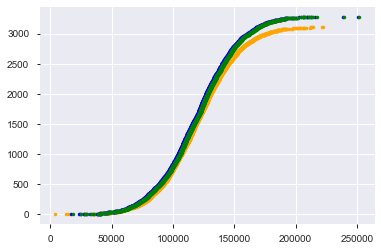

In [451]:
#hypothesis: active&not same mean
IsActiveNZBalance = data.loc[data['IsActiveMember'] == 1].loc[data['Balance']!=0]['Balance']
NotActiveNZBalance = data.loc[data['IsActiveMember'] == 0].loc[data['Balance']!=0]['Balance']
_ = plt.plot(np.sort(NotActiveNZBalance), np.arange(1, len(NotActiveNZBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(IsActiveNZBalance), np.arange(1, len(IsActiveNZBalance)+1), color='blue', marker='.', linestyle='none')

#emprical diff mean
EpActNZDiff = np.mean(IsActiveNZBalance) - np.mean(NotActiveNZBalance)

#shifted
IsActiveNZShifted = IsActiveNZBalance - np.mean(IsActiveNZBalance) + np.mean(NotActiveNZBalance)
_ = plt.plot(np.sort(IsActiveNZShifted), np.arange(1, len(IsActiveNZShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
BsActNZDiff = bs_rep(IsActiveNZShifted, np.mean, n) - bs_rep(NotActiveNZBalance, np.mean, n)
p = np.sum(BsActNZDiff >= EpActNZDiff)/n
p
#0.9492 likely same mean

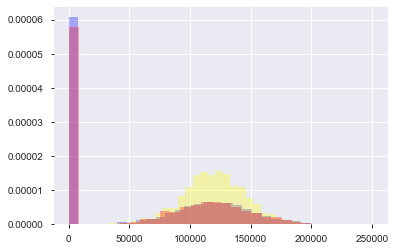

In [355]:
#country
France = data.loc[data['France'] == 1]
Germany = data.loc[data['Germany'] == 1]
Spain = data.loc[data['Spain'] == 1]

FranceBalance = France['Balance']
GermanyBalance = Germany['Balance']
SpainBalance = Spain['Balance']

_ = plt.hist(FranceBalance, bins=30, alpha=0.3, color='blue', normed=True)
_ = plt.hist(GermanyBalance, bins=30, alpha=0.3, color='yellow', normed=True)
_ = plt.hist(SpainBalance, bins=30, alpha=0.3, color='red', normed=True)

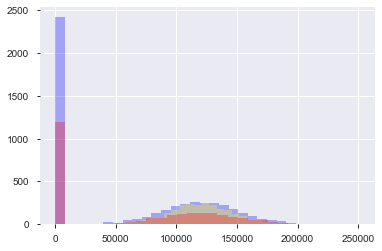

In [457]:
#country
France = data.loc[data['France'] == 1]
Germany = data.loc[data['Germany'] == 1]
Spain = data.loc[data['Spain'] == 1]

FranceBalance = France['Balance']
GermanyBalance = Germany['Balance']
SpainBalance = Spain['Balance']

_ = plt.hist(FranceBalance, bins=30, alpha=0.3, color='blue')
_ = plt.hist(GermanyBalance, bins=30, alpha=0.3, color='yellow')
_ = plt.hist(SpainBalance, bins=30, alpha=0.3, color='red')

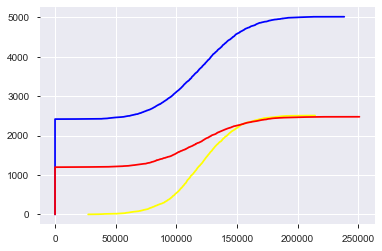

In [358]:
#ecdf
_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='blue')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='yellow')
_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='red')


0.424

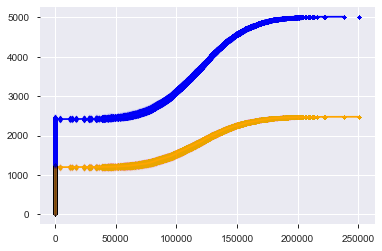

In [439]:
#hypothesis: country dist different 
#pm
#fr-sp
_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='blue')
#_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='yellow')
_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange')

FranceBalance = France['Balance']
GermanyBalance = Germany['Balance']
SpainBalance = Spain['Balance']

#pm
np.random.seed(42)
n = 1000
EpFRSPDiff = np.mean(FranceBalance) - np.mean(SpainBalance)
PmFRSPDiff = pm_rep(FranceBalance, SpainBalance, np.mean, n)
p = np.sum(PmFRSPDiff >= EpFRSPDiff)/n
p
#0.424 likely same dist and mean


0.4342

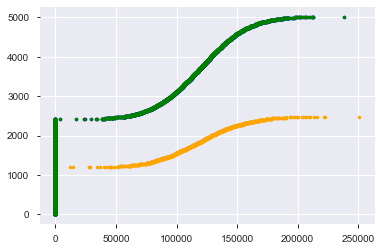

In [453]:
#fr-sp
FranceBalance = France['Balance']
SpainBalance = Spain['Balance']
_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange', marker='.', linestyle='none')
_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='blue', marker='.', linestyle='none')

#emprical diff mean
EpFRSPDiff = np.mean(FranceBalance) - np.mean(SpainBalance)

#shifted
FranceBalanceShifted = FranceBalance - np.mean(FranceBalance) + np.mean(SpainBalance)
_ = plt.plot(np.sort(FranceBalanceShifted), np.arange(1, len(FranceBalanceShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
BsFRSPDiff = bs_rep(FranceBalanceShifted, np.mean, n) - bs_rep(SpainBalance, np.mean, n)
p = np.sum(BsFRSPDiff >= EpFRSPDiff)/n
p

0.0

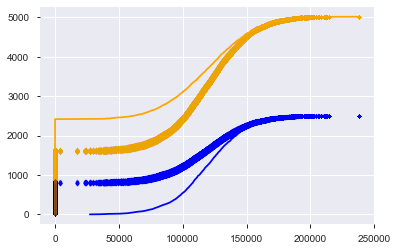

In [440]:
#pm fr-gr
_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='orange')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='blue')
#_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange')

#pm
np.random.seed(42)
n = 1000
EpFRGRDiff = np.mean(GermanyBalance) - np.mean(FranceBalance)
PmFRGRDiff = pm_rep(GermanyBalance, FranceBalance, np.mean, n)
p = np.sum(PmFRGRDiff >= EpFRGRDiff)/n
p
#0.0 not same dist or mean

0.0

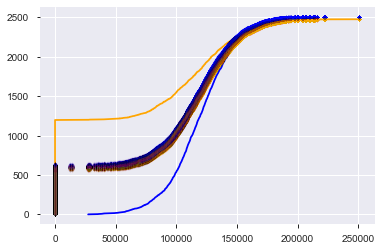

In [441]:
#pm sp-gr
#_ = plt.plot(np.sort(FranceBalance), np.arange(1, len(FranceBalance)+1), color='orange')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='blue')
_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange')

#pm
np.random.seed(42)
n = 1000
EpSPGRDiff = np.mean(GermanyBalance) - np.mean(SpainBalance)
PmSPGRDiff = pm_rep(GermanyBalance, SpainBalance, np.mean, n)
p = np.sum(PmSPGRDiff >= EpSPGRDiff)/n
p
#0.0 not same dist or mean

0.561

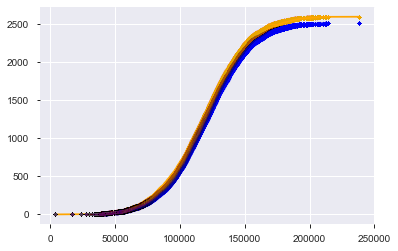

In [452]:
#pm frNZ-gr
FranceBalanceNZ = France.loc[France['Balance']!=0]['Balance']
GermanyBalance = Germany['Balance']

_ = plt.plot(np.sort(FranceBalanceNZ), np.arange(1, len(FranceBalanceNZ)+1), color='orange')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='blue')
#_ = plt.plot(np.sort(SpainBalance), np.arange(1, len(SpainBalance)+1), color='orange')

#pm
np.random.seed(42)
n = 1000
EpFRNZGRDiff = np.mean(GermanyBalance) - np.mean(FranceBalanceNZ)
PmFRNZGRDiff = pm_rep(GermanyBalance, FranceBalanceNZ, np.mean, n)
p = np.sum(PmFRNZGRDiff >= EpFRNZGRDiff)/n
p
#00.561

0.4117

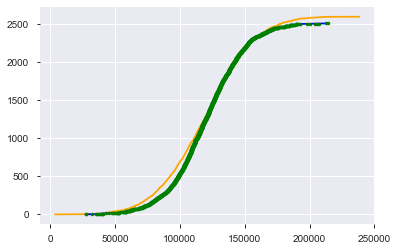

In [455]:
#frNZ-gr
FranceBalanceNZ = France.loc[France['Balance']!=0]['Balance']
GermanyBalance = Germany['Balance']

_ = plt.plot(np.sort(FranceBalanceNZ), np.arange(1, len(FranceBalanceNZ)+1), color='orange')
_ = plt.plot(np.sort(GermanyBalance), np.arange(1, len(GermanyBalance)+1), color='blue')


#emprical diff mean
EpFRNZGRDiff = np.mean(FranceBalanceNZ) - np.mean(GermanyBalance)

#shifted
GermanyBalanceShifted = GermanyBalance - np.mean(GermanyBalance) + np.mean(FranceBalanceNZ)
_ = plt.plot(np.sort(GermanyBalanceShifted), np.arange(1, len(GermanyBalanceShifted)+1), color='green', marker='.', linestyle='none')


#bs
n = 10000
np.random.seed(42)
BsFRNZGRDiff = bs_rep(FranceBalanceNZ, np.mean, n) - bs_rep(GermanyBalanceShifted, np.mean, n)
p = np.sum(BsFRNZGRDiff >= EpFRNZGRDiff)/n
p